In [50]:
import fractions
import math

fractions.gcd = math.gcd

import GG as gg
import numpy as np
import matplotlib.pyplot as plt

In [51]:
# def gauss_gcd_step(a, b):
#   x, y = gg.real(b/a), gg.imag(b/a)

#   qx, qy = math.floor(x + 0.5), math.floor(y + 0.5)

#   q = gg.GG(qx, qy)

#   r = b - q * a

#   return q, r

In [52]:
def gauss_gcd(a, b):
  q, r = divmod(a, b)
  q1 = r
  steps = 1
  while gg.norm(r) > 0:
    a, b = b, r
    q, r = divmod(a, b)
    steps += 1
    # if steps == 1:
    #   q1 = r
  return b, steps, q1

In [53]:
# def gauss_gcd(a, b):
#   q, r = gauss_gcd_step(a, b)
#   q1 = r
#   steps = 1
#   while abs(gg.norm(r)) > 0:
#     a, b = b, r
#     q, r = gauss_gcd_step(a, b)
#     steps += 1
#     # if steps == 1:
#     #   q1 = r
#   return b, steps, q1

In [54]:
def euler_phi(a):
  if gg.IsPrime(a):
    return gg.norm(a) - 1

  factors = gg.factor(a)
  # prod = gg.GG(1, 0)
  prod = gg.norm(a)

  for p in factors:
      if type(p) is int:
        p = gg.GG(p, 0)
      e = factors[p]
      if e < 1:
        continue
      prod *= (1 - 1 / gg.norm(p))

  return int(prod)

In [55]:
a = gg.GG(92, 87)
# 92 87

grid_size = 250

dividends = [gg.GG(x, y) for x in range(-grid_size, grid_size) for y in range(-grid_size, grid_size)]


In [56]:
steps = []
quots = []
phis = []
print(f"Norm of a: {gg.norm(a)}")
for b in dividends:
  if gg.norm(b) == 0:
    steps.append(1)
    phis.append(0)
    quots.append(0)
    continue
  g, s, q = gauss_gcd(a, b)
  steps.append(s)
  phis.append(euler_phi(b))
  quots.append(gg.norm(q))


Norm of a: 16033


In [57]:
assocs = [a, -a, a * gg.GG(0,1), a * gg.GG(0,-1)]

In [58]:
# d2 = [gg.GG(x, y) for x in range(-5, 5) for y in range(-5, 5)]

# for b in d2:
#     if gg.norm(b) != 0:
#         assocs.append(a / b)

In [59]:
def max_eqn(x):
    q, r = divmod(a, x)
    return 0.5 * gg.norm(x) - gg.norm(a - q * x)

In [60]:
g, s, r = gauss_gcd(a, (a - a * gg.GG(0,1)) / 2)
print(f"steps: {s}, remainder: {r}")

steps: 2, remainder: 1j


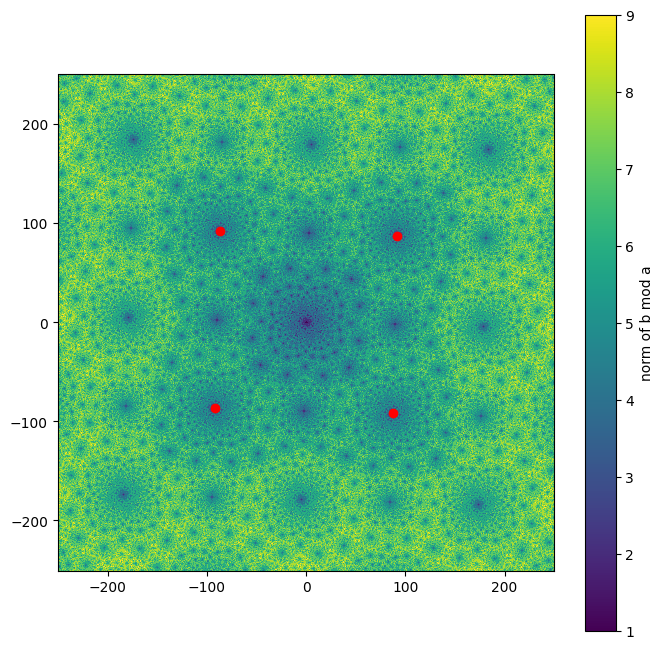

In [61]:
fig, ax = plt.subplots(figsize=(8, 8))

x, y = range(-grid_size, grid_size), range(-grid_size, grid_size)
X, Y = np.meshgrid(x, y, indexing='ij')

Z = np.array(steps).reshape(len(x), len(y))

cf = ax.pcolormesh(X, Y, Z, cmap='viridis', shading='nearest')

for assoc in assocs:
    ax.scatter(gg.real(assoc), gg.imag(assoc), color='red', zorder=5)

ax.set_aspect('equal')
cbar = plt.colorbar(cf)
cbar.set_label("norm of b mod a")

plt.show()

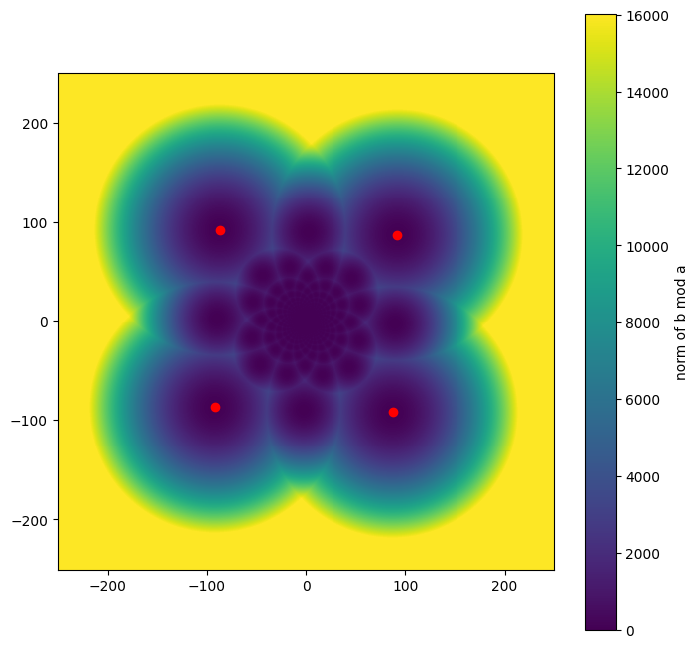

In [62]:
fig, ax = plt.subplots(figsize=(8, 8))

x, y = range(-grid_size, grid_size), range(-grid_size, grid_size)
X, Y = np.meshgrid(x, y, indexing='ij')

Z = np.array(quots).reshape(len(x), len(y))

cf = ax.pcolormesh(X, Y, Z, cmap='viridis', shading='nearest')

for assoc in assocs:
    ax.scatter(gg.real(assoc), gg.imag(assoc), color='red', zorder=5)

ax.set_aspect('equal')
cbar = plt.colorbar(cf)
cbar.set_label("norm of b mod a")

plt.show()

In [63]:
# Z = np.array(phis).reshape(2*grid_size, 2*grid_size)

# vmin = Z.min()
# vmax = Z.max()

# levels = np.arange(vmin, vmax + 1)

# x, y = range(-grid_size, grid_size), range(-grid_size, grid_size)
# X, Y = np.meshgrid(x, y)

# cf = plt.scatter(
#     X,
#     Y,
#     c=phis,
#     cmap='viridis',
#     s=20,
# )

# plt.scatter(gg.real(a), gg.imag(a), color='red')
# plt.gca().set_aspect('equal')

# cbar = plt.colorbar(cf)
# cbar.set_label("GCD steps")

# plt.show()